In [1]:
import pandas as pd
import os
import pickle
import glob
from auxiliary import *

In [2]:
%matplotlib inline

Threshold:

    412.000       1500.0000
    443.000       1408.0000
    490.000       1268.0000
    510.000       1200.0000
    555.000       1000.0000
    670.000       1000.0000
    765.000       500.00000
    865.000       500.00000
Baseline:

    412.000       1700.0000
    443.000       1700.0000
    490.000       1475.0000
    510.000       1390.0000
    555.000       1200.0000
    670.000       1400.0000
    765.000       600.00000
    865.000       600.00000



In [3]:
# set up data stream
SNRs = ['baseline','threshold']
mainDir = '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY'
subDirs = ['DATA/Pace_170217/%s' % SNR for SNR in SNRs]

In [4]:
filePattern = 'S20031932003196.L3b_4D*'

In [5]:
filePattern = 'S20031932003196.L3b_4D*'
fileList = [glob.glob(os.path.join(mainDir, subDir,
                                   filePattern))[0] for subDir in subDirs]

In [6]:
simDict = {snr:file for snr,file in zip(SNRs, fileList)}

In [7]:
ptiles = ['50', '70', '80', '90', '95']
rhoUncPtileDict = dict.fromkeys(SNRs)
for snr in SNRs:
    rhoUncPtileDict[snr] = dict.fromkeys(ptiles)
    # Get data needed in form of a dict
    if simDict[snr]:
        print('processing %s' % simDict[snr])
        _, rhoUncDict,_ = GetDataDicts(fp=simDict[snr])
        for ptile in ptiles:
            rhoUncPtileDict[snr][ptile] = GetPtileDict(rhoUncDict, ptile=int(ptile)/100)

processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/Pace_170217/baseline/S20031932003196.L3b_4D_SU53.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/Pace_170217/threshold/S20031932003196.L3b_4D_SU54.nc


In [8]:
# Now I need to plot these percentiles for each NIR SNR Scenarios:
pn = pd.Panel(rhoUncPtileDict)

In [9]:
writer = pd.ExcelWriter('paceSim170217.xlsx')
df1 = pn['baseline']
df2 = pn['threshold']
df1.to_excel(writer,'baseline')
df2.to_excel(writer,'threshold')
writer.save()

In [9]:
pn['baseline']

,50,70,80,90,95
412,0.000528,0.000613,0.000690,0.000811,0.000914
443,0.000446,0.000513,0.000575,0.000675,0.000767
490,0.000364,0.000413,0.000459,0.000531,0.000597
510,0.000338,0.000380,0.000418,0.000483,0.000540
555,0.000269,0.000300,0.000327,0.000377,0.000423
670,0.000117,0.000132,0.000146,0.000172,0.000195


In [11]:
pn['threshold']

,50,70,80,90,95
412,0.000624,0.000726,0.000814,0.000955,0.001074
443,0.000529,0.000609,0.000680,0.000798,0.000902
490,0.000433,0.000489,0.000540,0.000626,0.000702
510,0.000402,0.000449,0.000494,0.000569,0.000635
555,0.000320,0.000355,0.000390,0.000446,0.000501
670,0.000141,0.000158,0.000176,0.000207,0.000234


In [10]:
pn.to_pickle('../../PACE_180228/PklJar/pn_170217.pkl')

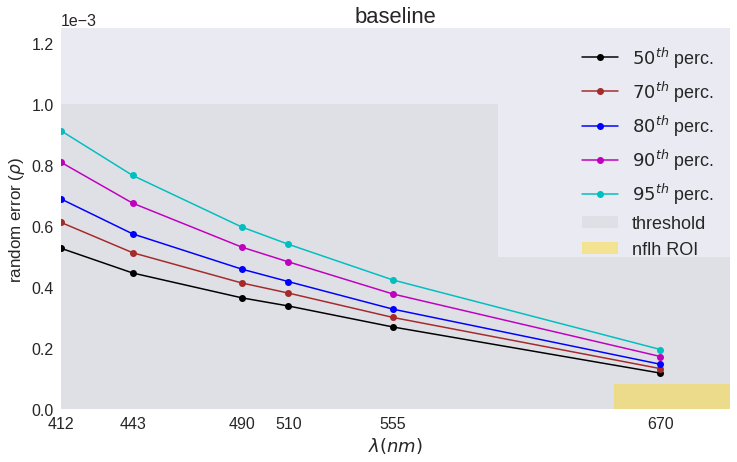

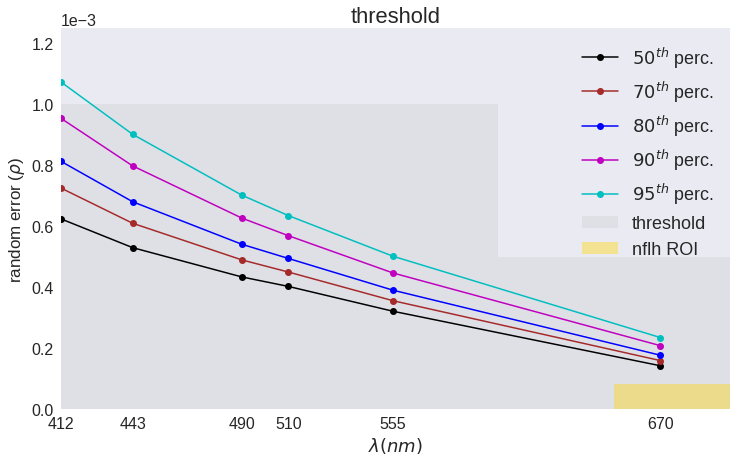

In [11]:
for scenario in SNRs:
    df = pn[scenario]
    PlotPtiles2(df, ptiles, title=scenario, 
               savepath=os.path.join(mainDir,
                                     'DATA/Pace_170217/PaceSNR_sim_%s_ptiles_new.png'
                                     % scenario), redThresh=5e-4, ymax=1.25e-3)

### UPDATE: 2/20/17
Jeremy wants **baseline** plot with 8e-4 subred threshold box and 4e-4 for redThreshold.
I'll adjust the max plot height for ymax=1.2

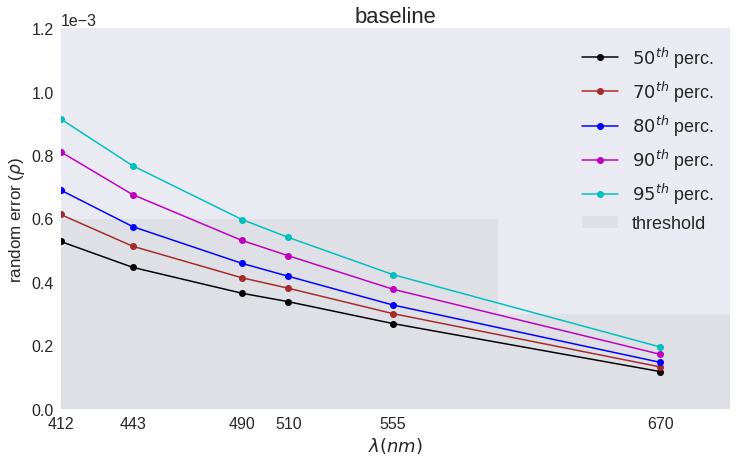

In [14]:
scenario = 'baseline'
PlotPtiles2(pn[scenario],ptiles,title=scenario,
            savepath = os.path.join(mainDir,
                                    'DATA/Pace_170217/PaceSNR_sim_%s_ptiles_6e-4_3e-4.png'),
           subRedThresh=6e-4, redThresh=3e-4, ymax=1.2e-3, drawflhroi=False,
           shadowLabel='baseline')

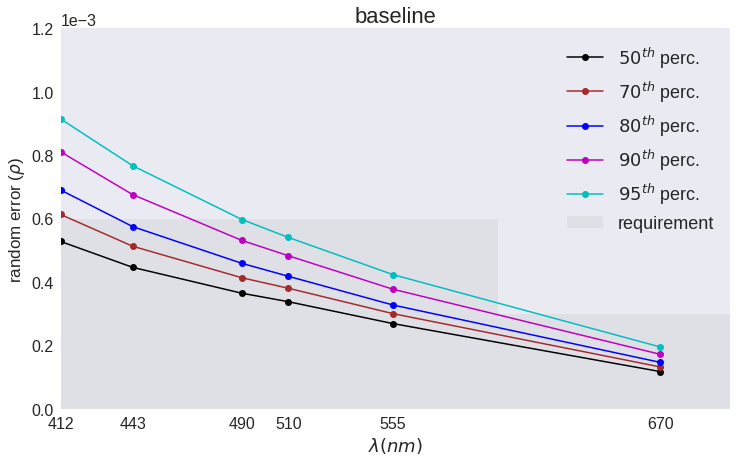

In [10]:
scenario = 'baseline'
PlotPtiles2(pn[scenario],ptiles,title="baseline",
            savepath = os.path.join(mainDir,
                                    'DATA/Pace_170217/PaceSNR_sim_%s_ptiles_6e-4_3e-4_req.png'),
           subRedThresh=6e-4, redThresh=3e-4, ymax=1.2e-3, drawflhroi=False,
           shadowLabel='requirement')

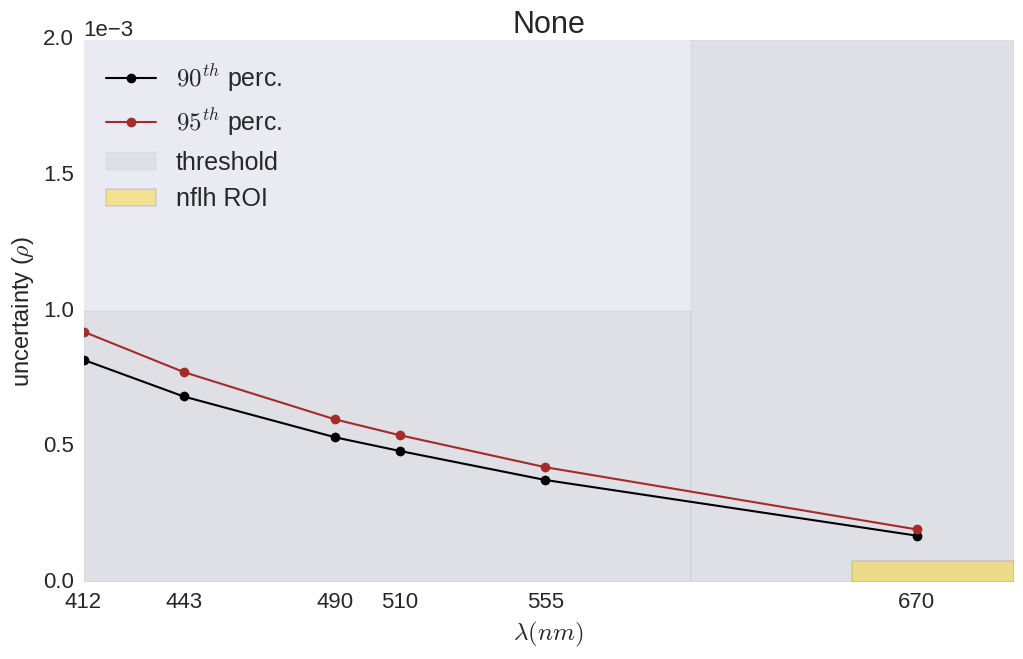

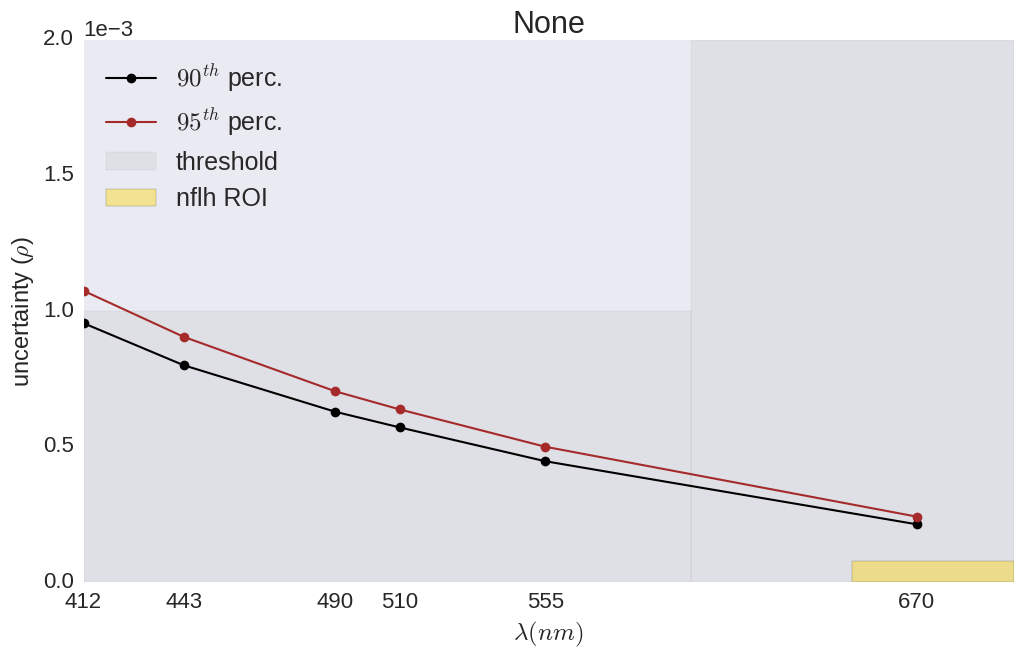

In [11]:
for scenario in SNRs:
    df = pn[scenario]
    PlotPtiles(df, ['90', '95'], savepath='PaceSNR_sim_%s_90_95ptiles.png' % (scenario))

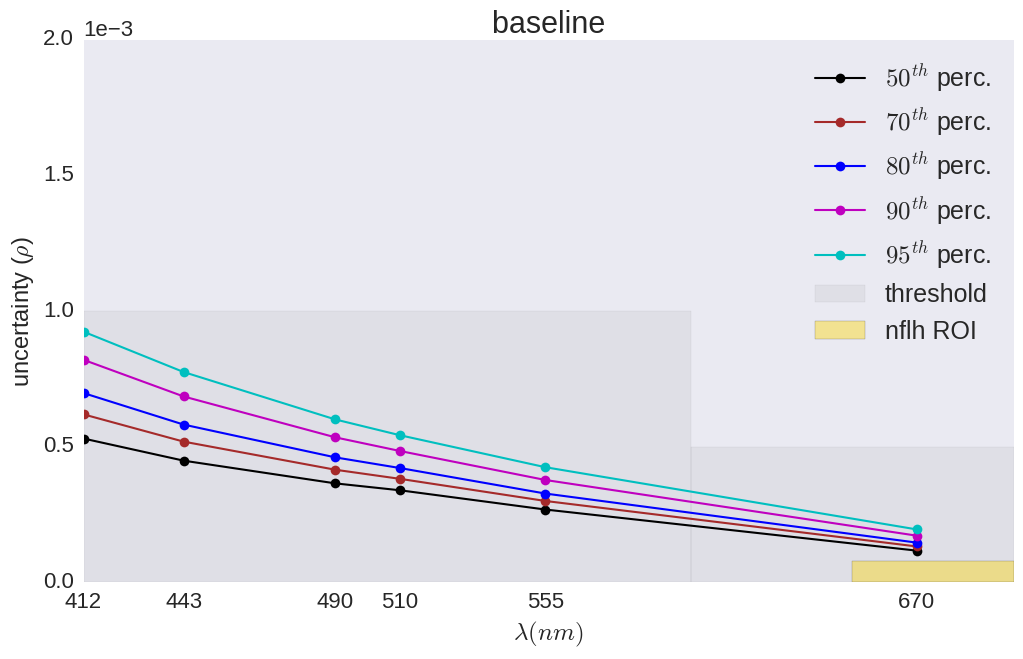

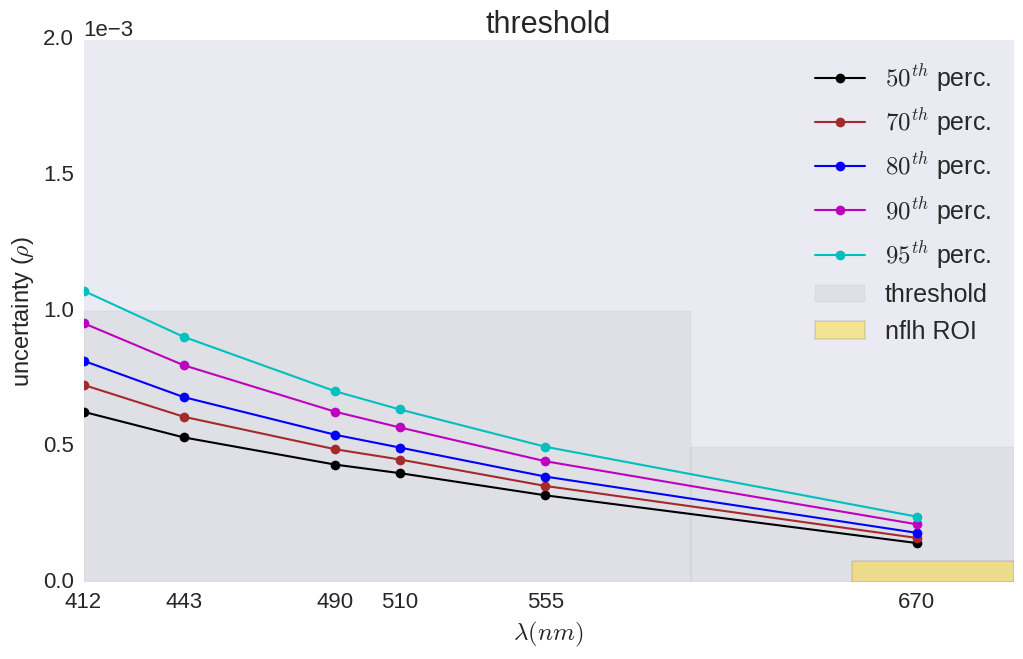

In [9]:
for scenario in SNRs:
    df = pn[scenario]
    PlotPtiles2(df, ptiles, title=scenario, 
               savepath='PaceSNR_sim_%s_ptiles.png' % scenario, axYmaxBase=1e-3,
               redThresh=5e-4)